# 5阶俄罗斯方块
5阶俄罗斯方块有多少种形状？N阶呢？

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Shape:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.n = len(x)
        self.h = None
    
    def to_array(self):
        a = np.zeros([self.n, self.n], dtype=int)
        for i in range(self.n):
            a[self.y[i], self.x[i]] = 1
        return a
        
    def align(self):
        x0 = min(self.x)
        y0 = min(self.y)
        for i in range(self.n):
            self.x[i] -= x0
            self.y[i] -= y0
            
    def rotate(self):
        y = list(map(lambda v: -v, self.x))
        return Shape(self.y, y)
    
    def flip(self):
        y = list(map(lambda v: -v, self.y))
        return Shape(self.x, y)
    
    def hash(self):
        if self.h:
            return self.h
        self.align()
        m = map(lambda a,b: a+b*self.n, self.x, self.y)
        h = list(m)
        h.sort()
        self.h = h
        return self.h
    
    def is_same(self, other, flip=False):
        h1 = self.hash()
        h2 = self.flip().hash() if flip else h1
        h = other.hash()
        if h == h1 or h == h2:
            return True
        for i in range(3):
            other = other.rotate()
            h = other.hash()
            if h == h1 or h == h2:
                return True
        return False
    
    def extend(self, x, y):
        for i in range(self.n):
            if self.x[i] == x and self.y[i] == y:
                return None
        x2 = list(self.x)
        y2 = list(self.y)
        x2.append(x)
        y2.append(y)
        return Shape(x2, y2)
    
    def grow(self):
        shapes = []
        for i in range(self.n):
            x = self.x[i]
            y = self.y[i]
            shapes.append(self.extend(x - 1, y))
            shapes.append(self.extend(x + 1, y))
            shapes.append(self.extend(x, y - 1))
            shapes.append(self.extend(x, y + 1))
        return shapes
            

In [3]:
s = Shape([0, 1, 2, 3, 3], [4, 4, 4, 4, 5])
s.align()
s.to_array()

array([[1, 1, 1, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [4]:
s.hash()

[0, 1, 2, 3, 8]

In [5]:
r = s.rotate()
r.is_same(s)

True

In [6]:
def draw_shape(s, ax, scale, x0, y0):
    if s is None:
        return
    s.align()
    x1 = min(s.x)
    x2 = max(s.x)
    y1 = min(s.y)
    y2 = max(s.y)
    nn = s.n * 2.0
    x0 += (s.n - (x2 - x1 + 1)) / nn
    y0 += (s.n - (y2 - y1 + 1)) / nn
    x0 /= scale
    y0 /= scale
    scale *= s.n
    for i in range(s.n):
        rect = plt.Rectangle((s.x[i]/scale + x0, s.y[i]/scale + y0), 1/scale, 1/scale, ec='y')
        ax.add_patch(rect)
    
def draw(shapes):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, aspect='equal')
    total = len(shapes)
    sqrt = total ** 0.5
    scale = int(sqrt) + (1 if sqrt-int(sqrt) else 0)
    for i in range(total):
        draw_shape(shapes[i], ax, scale, i % scale, scale - 1 - int(i / scale))
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.show()

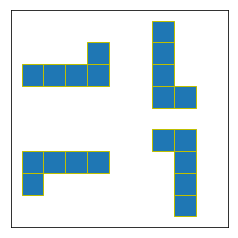

In [7]:
s = Shape([0, 1, 2, 3, 3], [4, 4, 4, 4, 5])
r1 = s.rotate()
r2 = r1.rotate()
r3 = r2.rotate()
r2.is_same(r3)

draw([s, r1, r2, r3])

In [8]:
a = [1,2,3]
b = [1,3,2]
#b.sort()
a == b

False

In [9]:
list(map(lambda x,y: x*y, a,b))

[1, 6, 6]

In [10]:
class Result:
    def __init__(self, flip=False):
        self.rset = []
        self.flip = flip
        
    def save(self, obj):
        if obj is None:
            return
        for s in self.rset:
           if obj.is_same(s, self.flip):
                return
        self.rset.append(obj)
        
    def grow1(self, s):
        objs = s.grow()
        for obj in objs:
            self.save(obj)
            
    def grow(self, ss):
        for s in ss:
            self.grow1(s)
        return self.rset

def solve(n, flip=False):
    s = Shape([0], [0])
    shapes = [s]
    for i in range(n - 1):
        print(i + 1, len(shapes))
        r = Result(flip)
        shapes = r.grow(shapes)
    print("Total: ", len(shapes))
    draw(shapes)

1 1
2 1
3 2
Total:  7


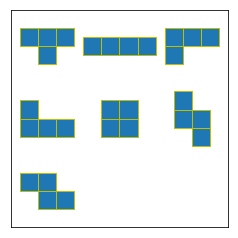

In [11]:
solve(4)

1 1
2 1
3 2
Total:  5


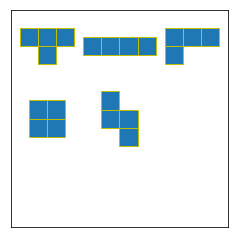

In [12]:
solve(4, flip=True)

1 1
2 1
3 2
4 7
Total:  18


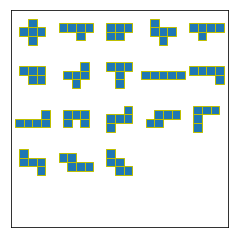

In [13]:
solve(5)

1 1
2 1
3 2
4 5
Total:  12


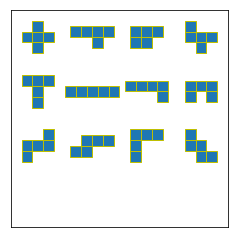

In [14]:
solve(5, flip=True)

1 1
2 1
3 2
4 7
5 18
Total:  60


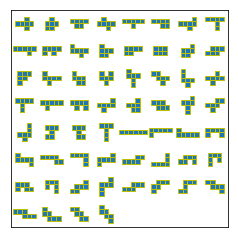

In [15]:
solve(6)

1 1
2 1
3 2
4 5
5 12
Total:  35


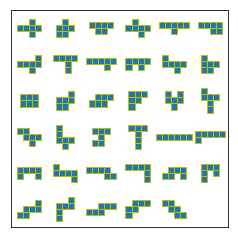

In [16]:
solve(6, flip=True)

1 1
2 1
3 2
4 7
5 18
6 60
Total:  196


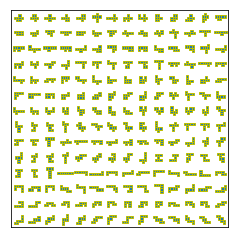

In [17]:
solve(7)